#Wrapper Methods Feature Selection Techniques

The paper employed Correlation matrix (heatmap) analysis to identify and remove highly correlated features that may contribute to multicollinearity.

## LR

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [ ]:
# ---- 1. Forward Feature Selection (FSF) ----
fsf_selector = SelectKBest(score_func=f_classif, k=10)  # Select top 5 features
X_new_fsf = fsf_selector.fit_transform(X_resampled, y_resampled)
selected_fsf_features = X.columns[fsf_selector.get_support()]

print("Forward Feature Selection Features:", selected_fsf_features.tolist())

Forward Feature Selection Features: ['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']


In [ ]:
FSF = ['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

In [ ]:
# ---- 2. Recursive Feature Elimination ----

log_reg = LogisticRegression(max_iter=500, solver='liblinear')
rfe_selector = RFE(log_reg, n_features_to_select=10)  # Select top 5 features
rfe_selector.fit(X_resampled, y_resampled)
selected_rfe_features = X.columns[rfe_selector.support_]

# Results
print("Recursive Feature Elimination Features:", selected_rfe_features.tolist())

Recursive Feature Elimination Features: ['V4', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V27', 'V28']


In [ ]:
RFF = ['V4', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V27', 'V28']

## RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Use feature importances to select top features
sfm = SelectFromModel(rf_model, prefit=True, threshold="median")  # Select features above the median importance
X_new_sfm = sfm.transform(X_resampled)
selected_rf_features = X_resampled.columns[sfm.get_support()]

print("Selected Features by RF + SelectFromModel:", selected_rf_features.tolist())


Selected Features by RF + SelectFromModel: ['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
RFSM = ['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21']

# Models

## First Model, Random Forest

### Using SFS

[link text](https://chatgpt.com/share/67fcd5c0-69e8-8006-945e-f5df6de64306)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
FSFX_train = X_train[FSF]

In [ ]:
FSFrf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, random_state=42)
FSFrf.fit(FSFX_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
FSFX_test = X_test[FSF]

Precision: 0.99
Recall: 0.95
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     56863
           1       0.99      0.95      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



<ipython-input-36-73a33cc5fd16>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette='viridis')


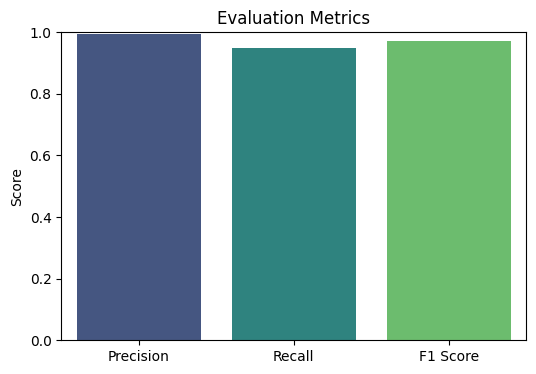

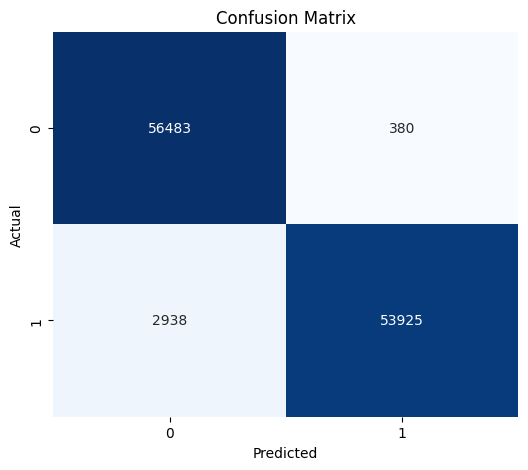

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Predictions
y_pred = FSFrf.predict(FSFX_test)

# Scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot bar chart of metrics
plt.figure(figsize=(6, 4))
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1 Score']
sns.barplot(x=labels, y=metrics, palette='viridis')
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### SFS explain

In [ ]:
importances = FSFrf.feature_importances_

# Create a DataFrame for sorting and display
feature_importance_df = pd.DataFrame({
    'Feature': FSFX_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top N features
print(feature_importance_df.head(10))

  Feature  Importance
7     V14    0.370497
4     V10    0.200511
6     V12    0.138685
9     V17    0.116796
2      V4    0.105681
5     V11    0.027514
1      V3    0.017889
8     V16    0.015950
3      V9    0.004244
0      V2    0.002233


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

<Figure size 1500x1000 with 0 Axes>

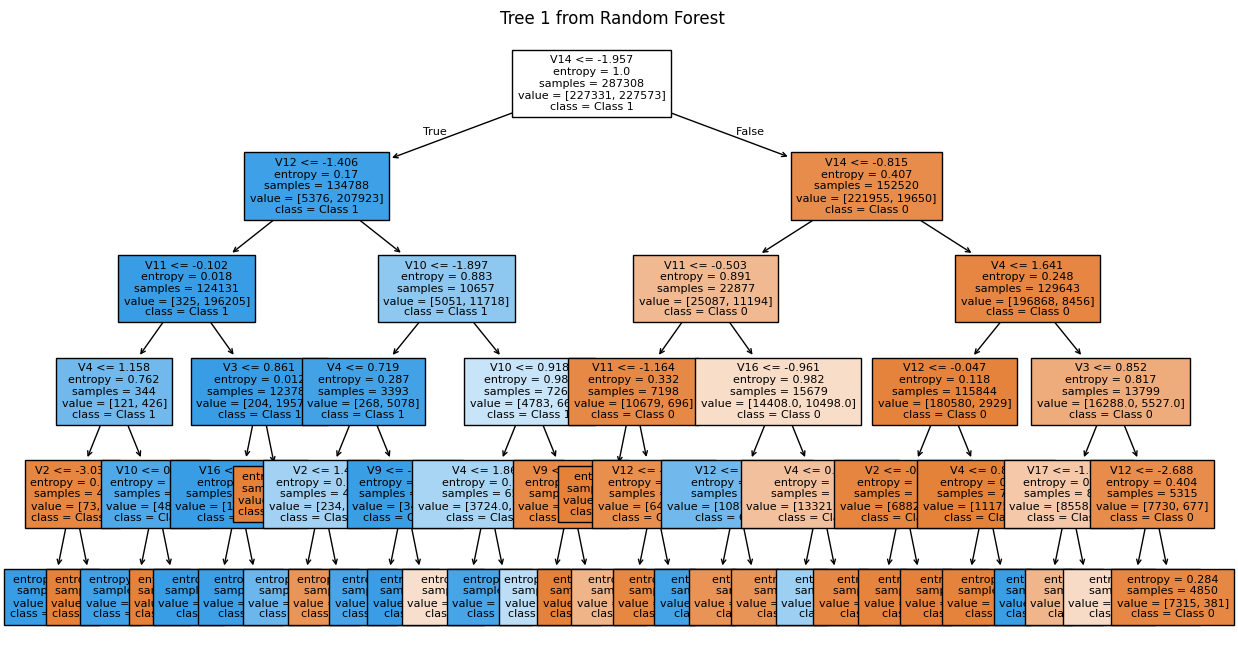

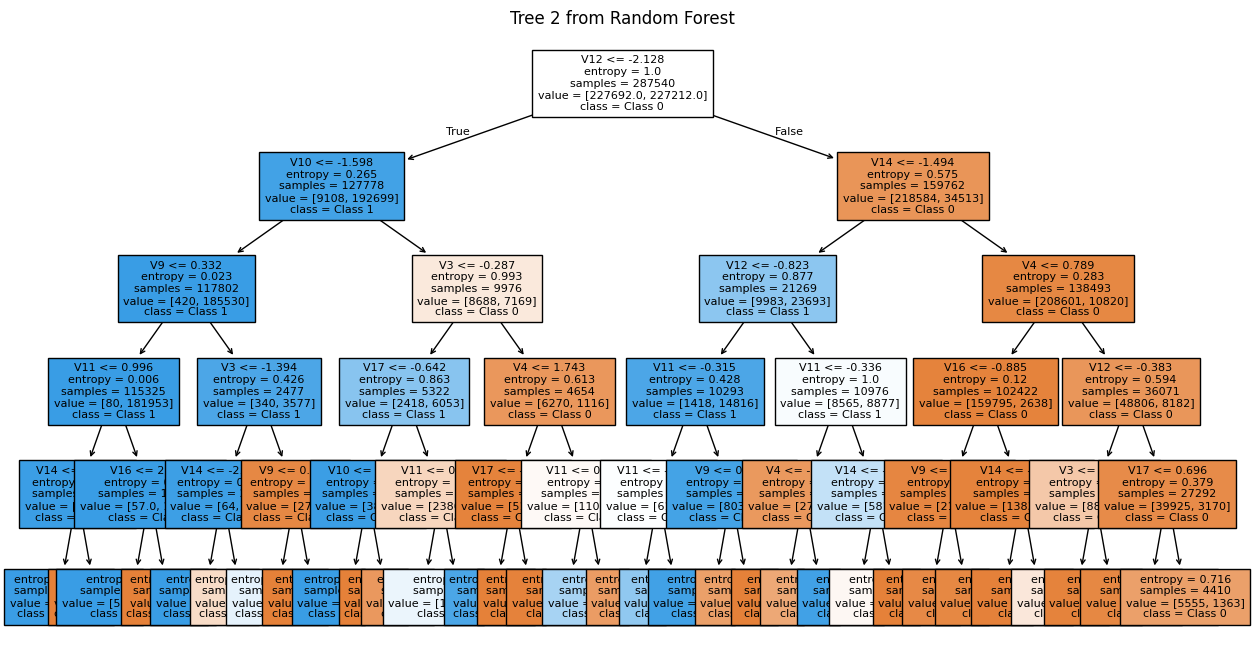

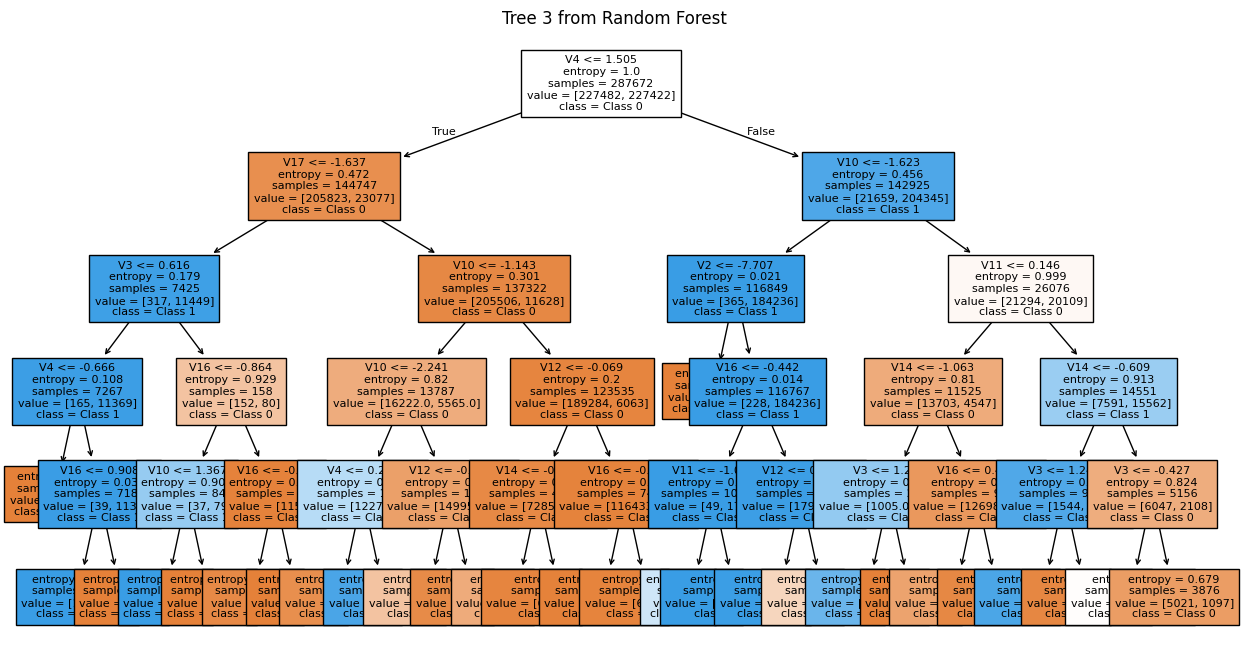

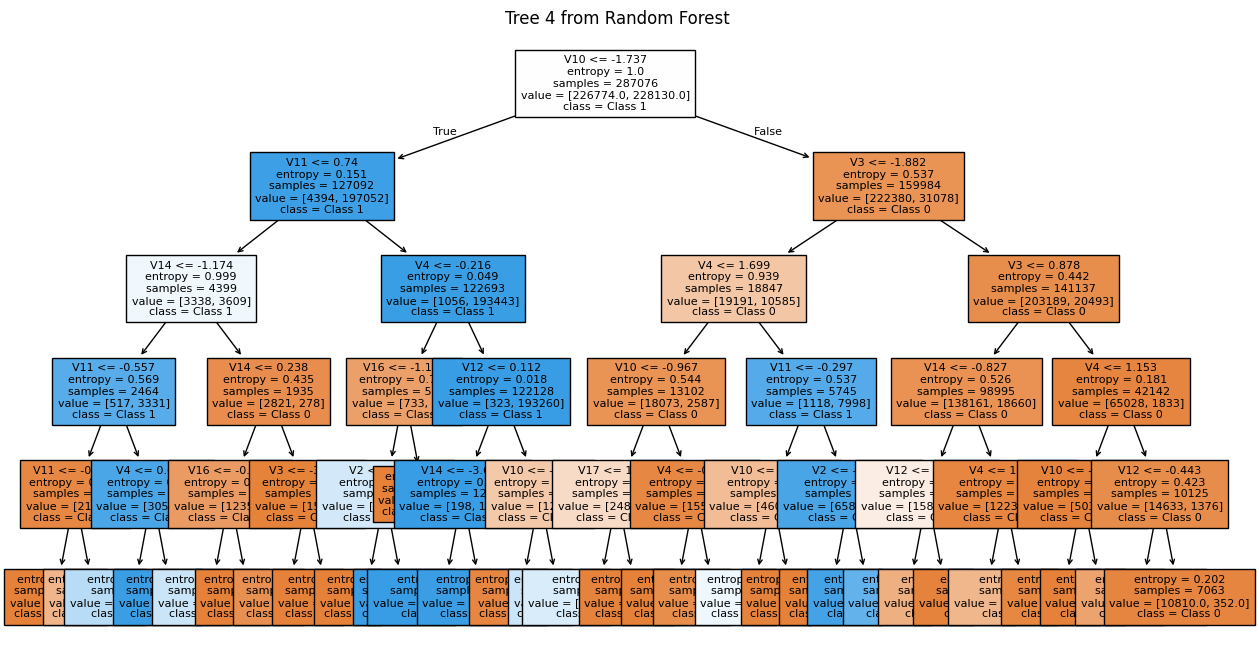

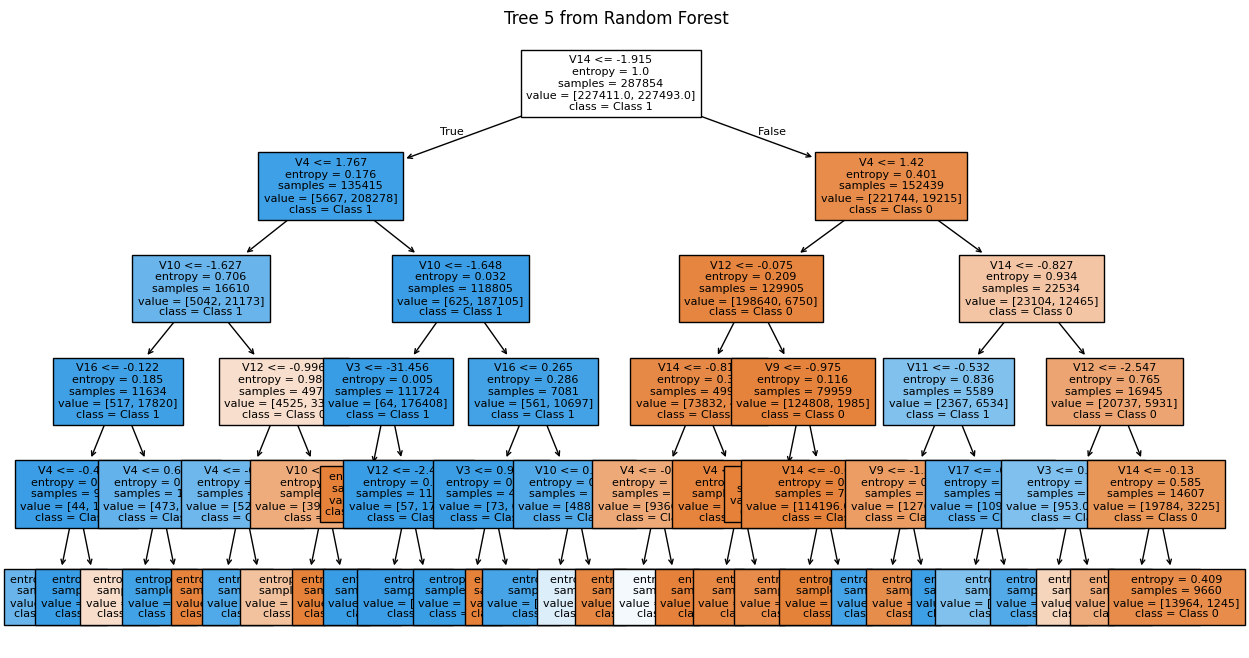

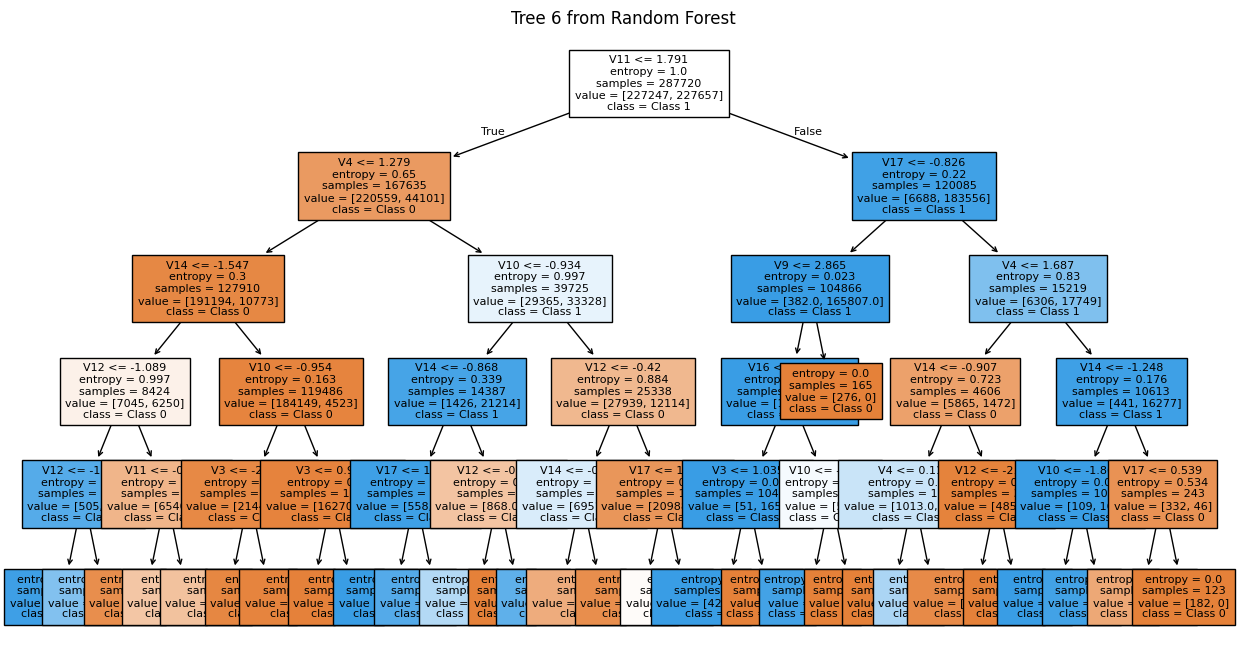

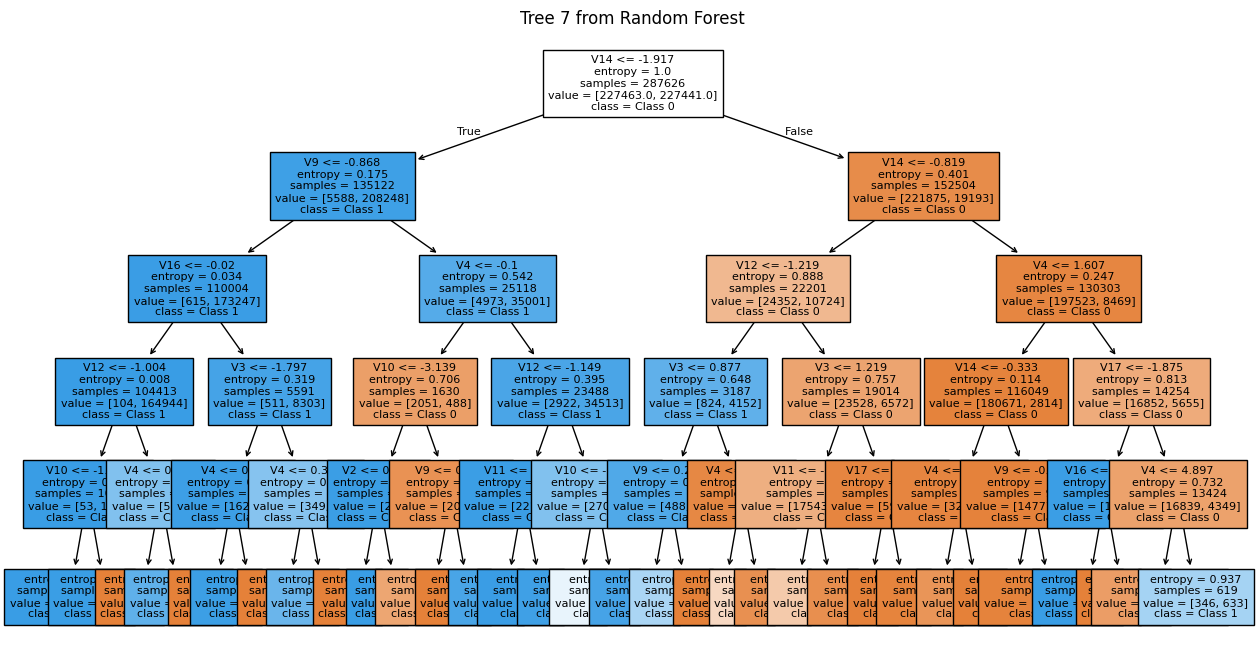

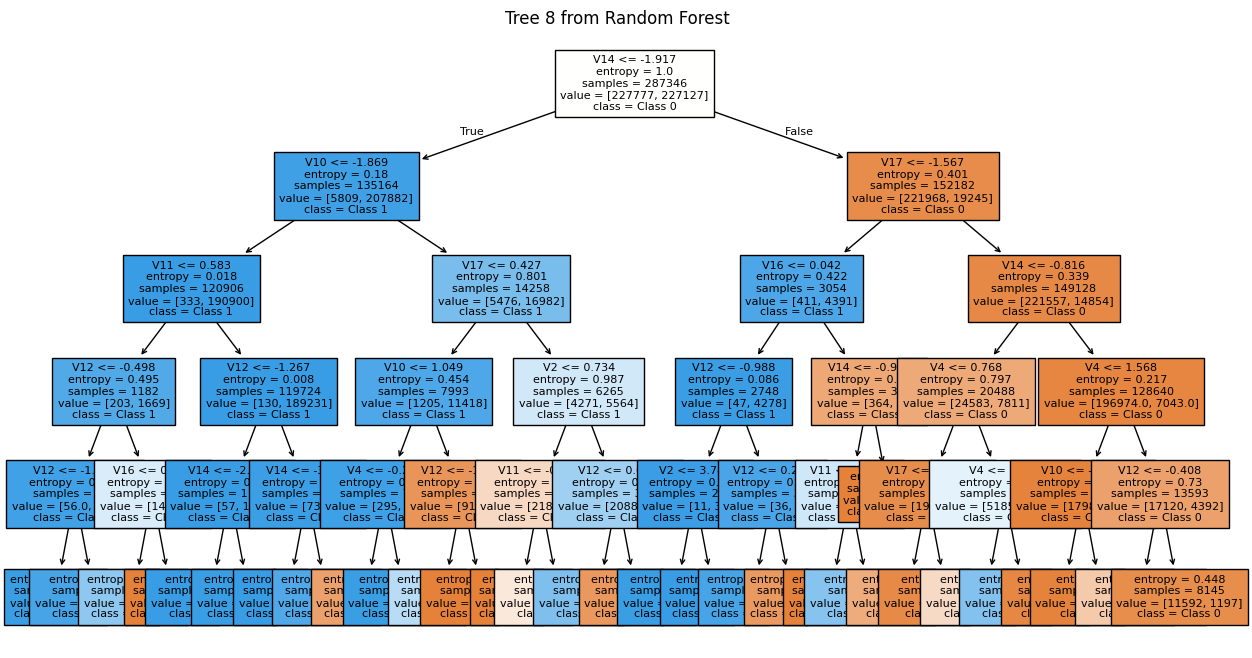

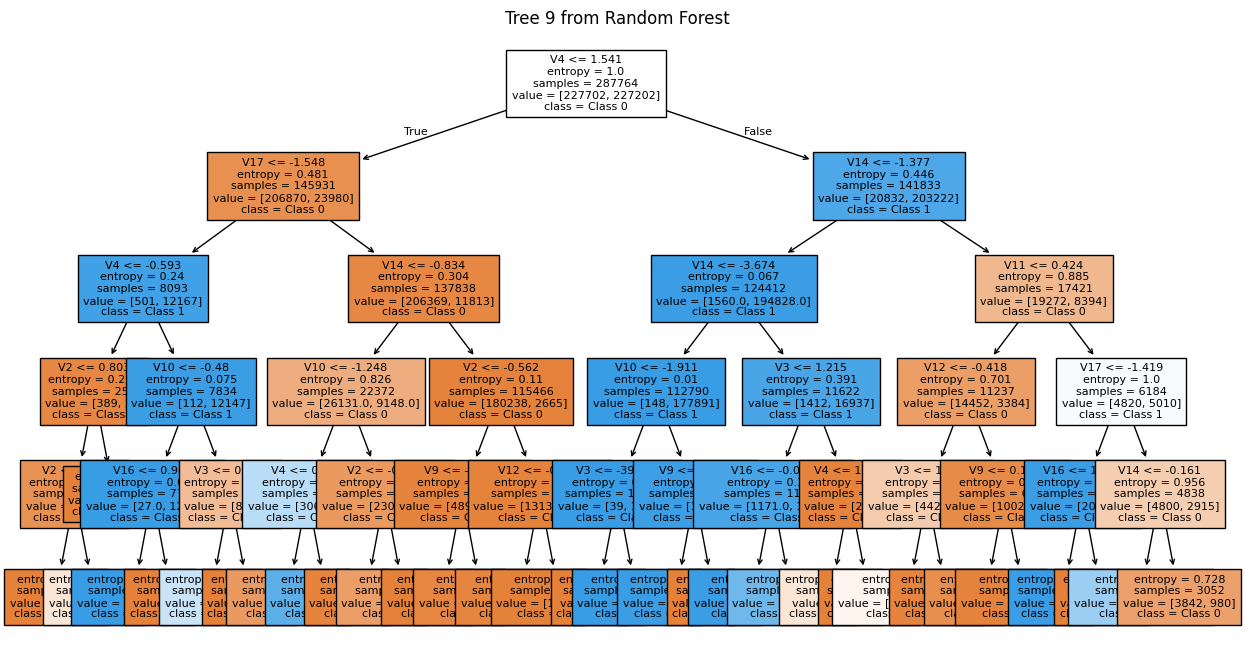

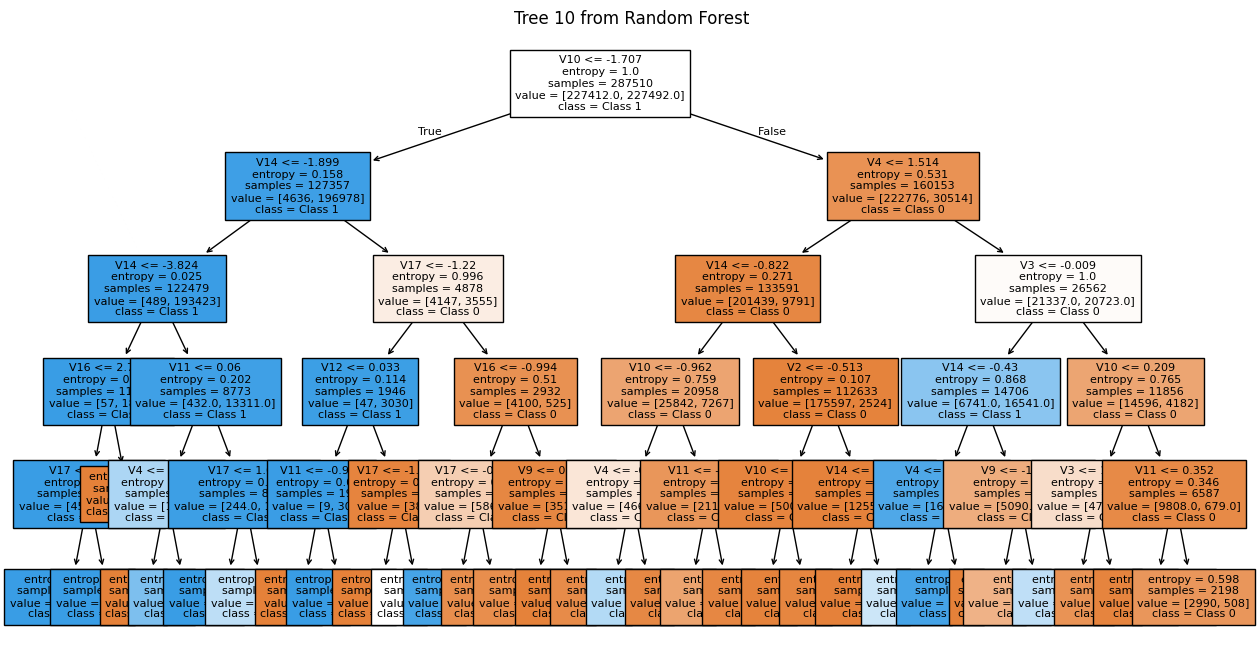

In [ ]:
num_trees_to_plot = 10  # Change this to visualize more trees

plt.figure(figsize=(15, 10))

for i in range(num_trees_to_plot):
    plt.figure(figsize=(15, 8))
    plot_tree(FSFrf.estimators_[i],
              filled=True,
              feature_names=FSFX_train.columns,
              class_names=["Class 0", "Class 1"],
              fontsize=8)
    plt.title(f"Tree {i+1} from Random Forest")
    plt.show()

### Using RFF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
RFFX_train = X_train[RFF]

In [ ]:
RFFrf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, random_state=42)
RFFrf.fit(RFFX_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
RFFX_test = X_test[RFF]

Precision: 0.99
Recall: 0.95
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     56863
           1       0.99      0.95      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



<ipython-input-40-ac0fb3aab614>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette='viridis')


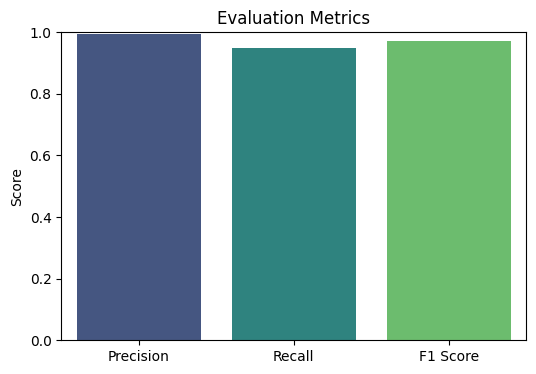

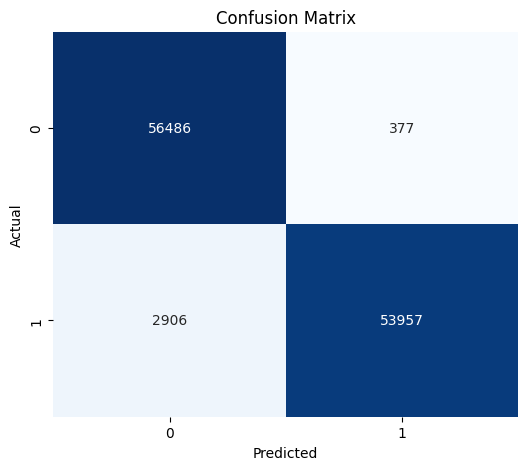

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Predictions
y_pred = RFFrf.predict(RFFX_test)

# Scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot bar chart of metrics
plt.figure(figsize=(6, 4))
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1 Score']
sns.barplot(x=labels, y=metrics, palette='viridis')
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### RF Explanation

In [ ]:
importances = RFFrf.feature_importances_

# Create a DataFrame for sorting and display
feature_importance_df = pd.DataFrame({
    'Feature': RFFX_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top N features
print(feature_importance_df.head(10))

  Feature  Importance
5     V14    0.338776
1     V10    0.198203
3     V12    0.161231
7     V17    0.119362
0      V4    0.103578
2     V11    0.045706
6     V16    0.023222
8     V27    0.003949
9     V28    0.003502
4     V13    0.002471


<Figure size 1500x1000 with 0 Axes>

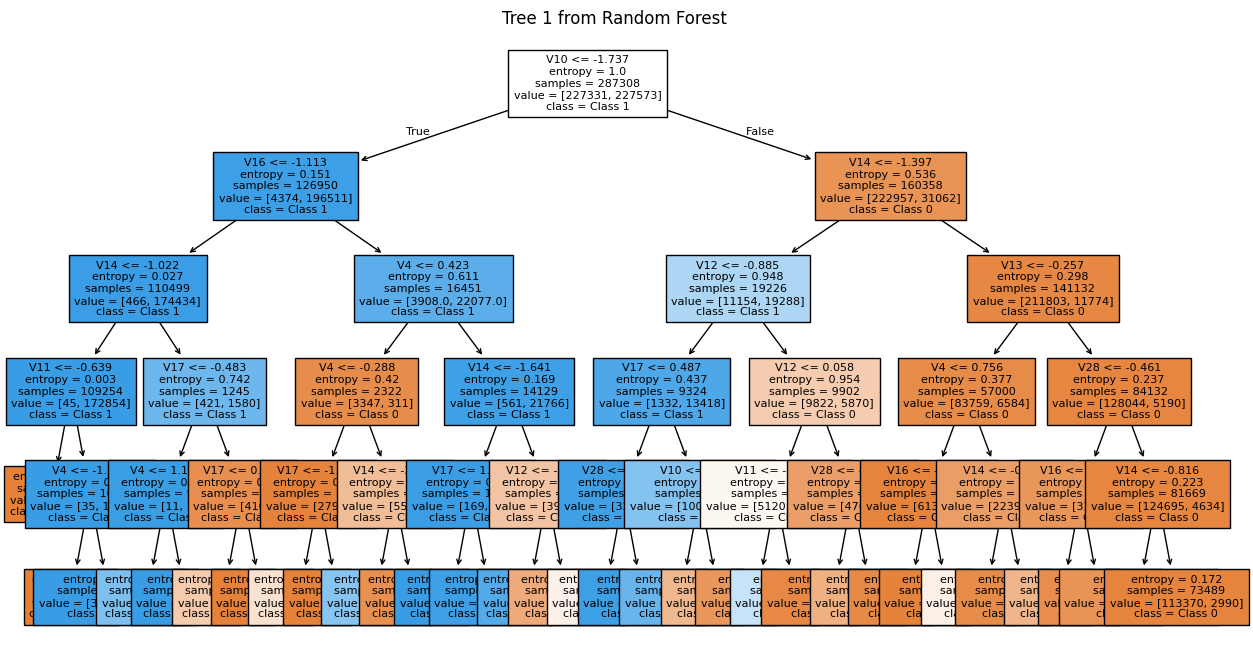

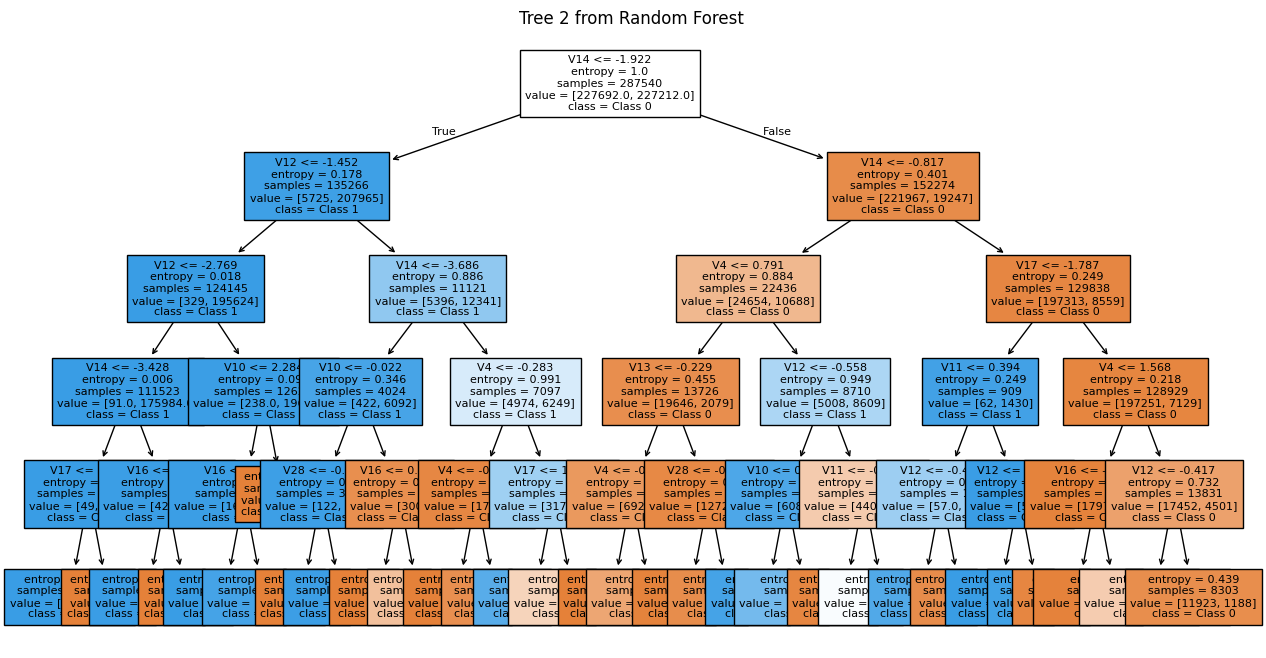

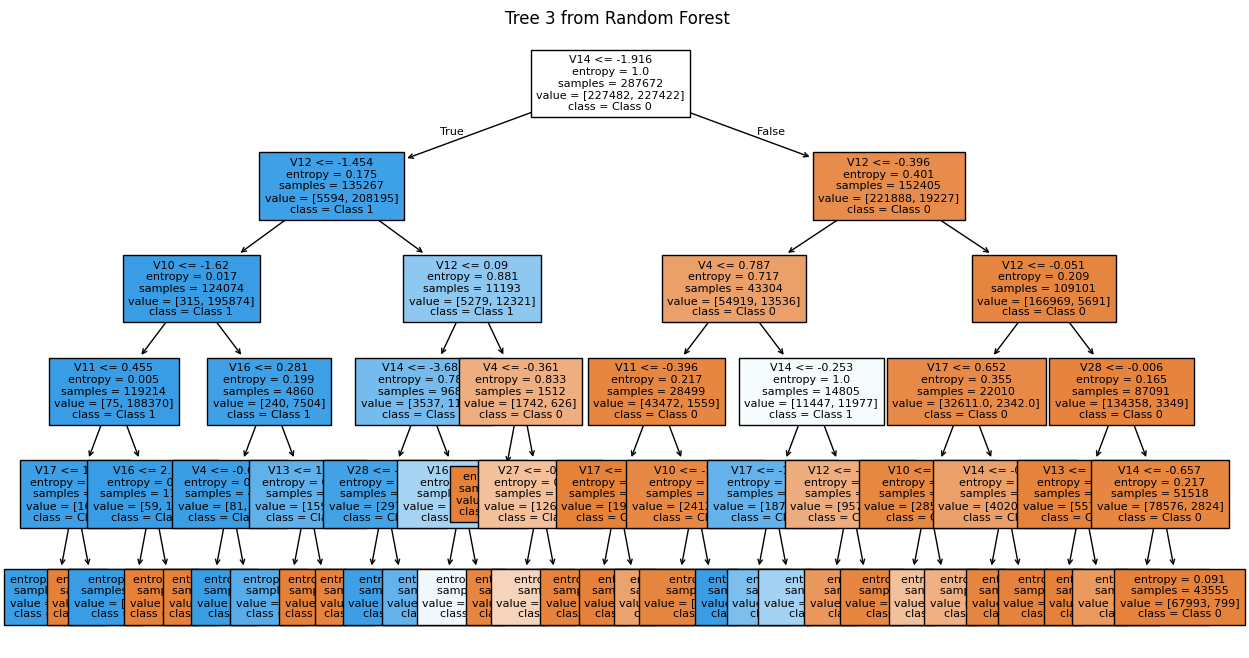

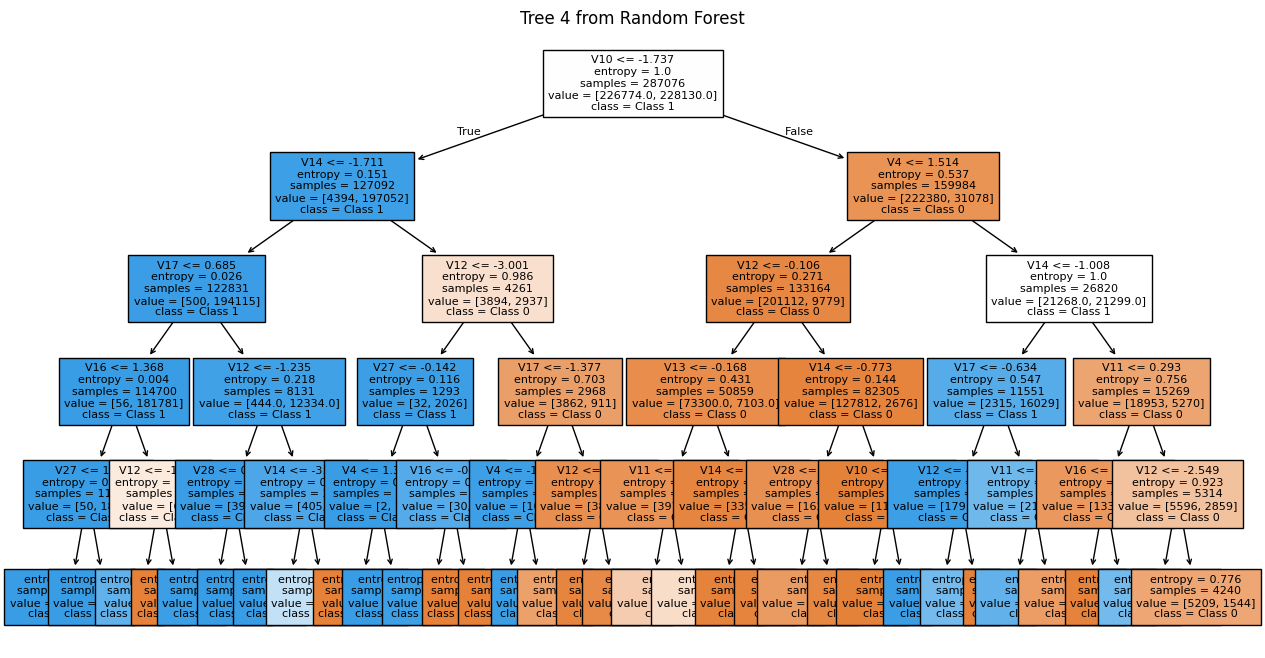

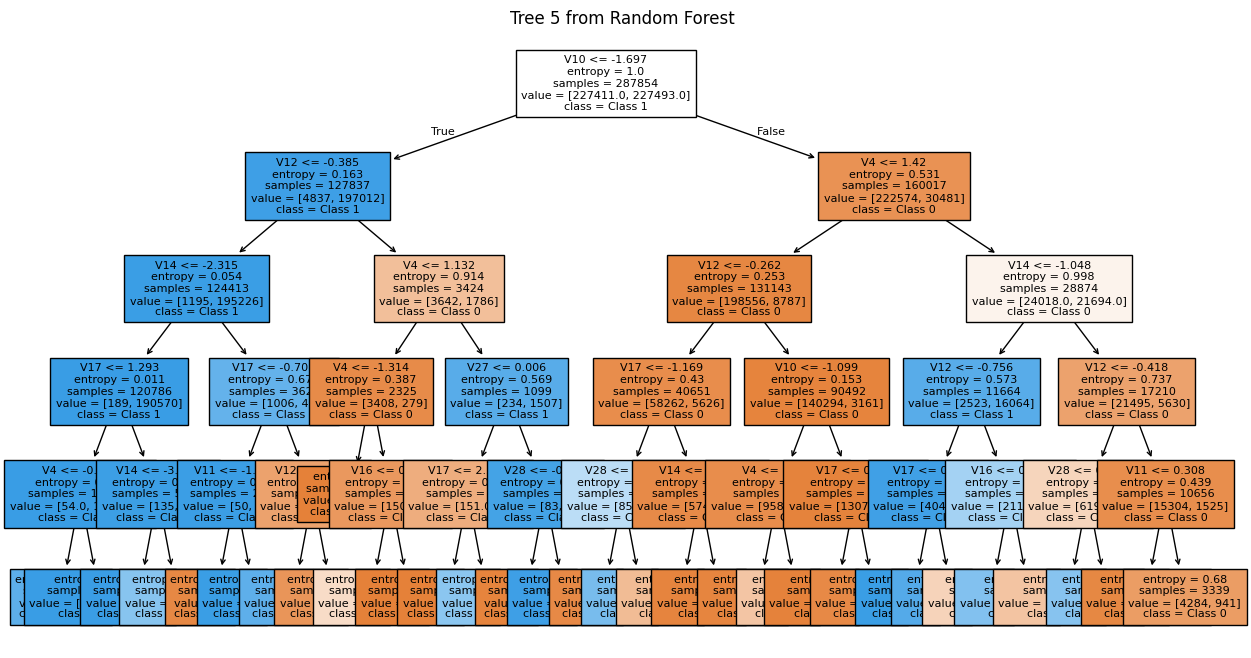

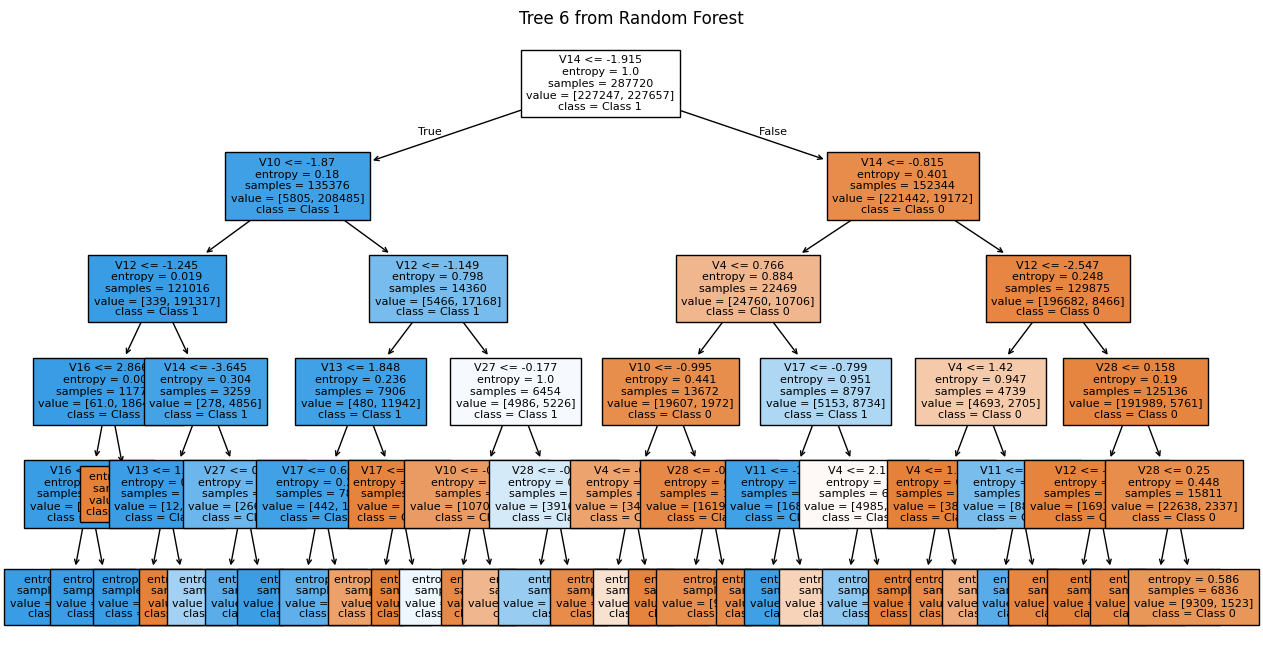

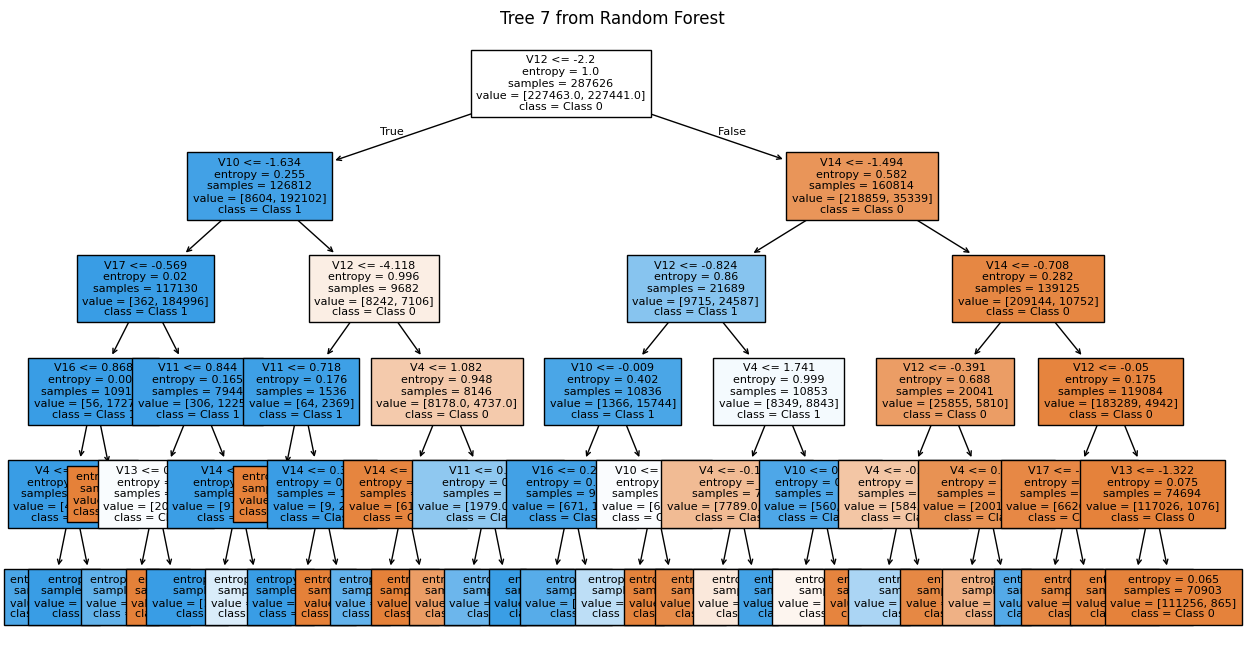

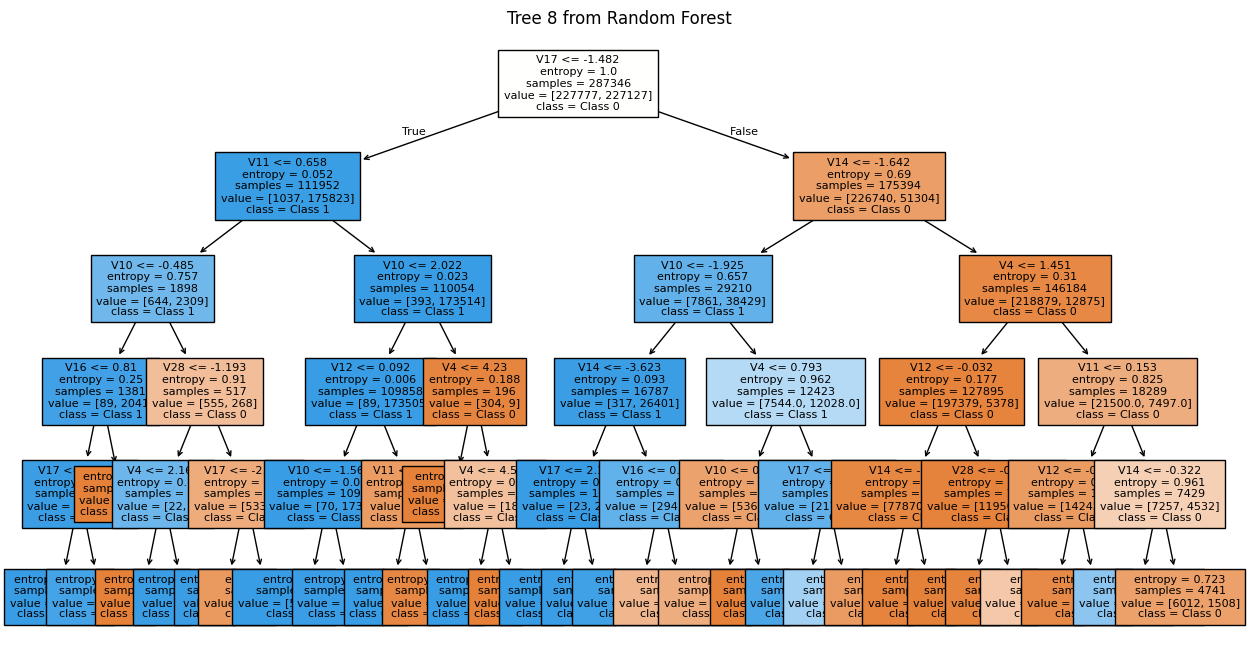

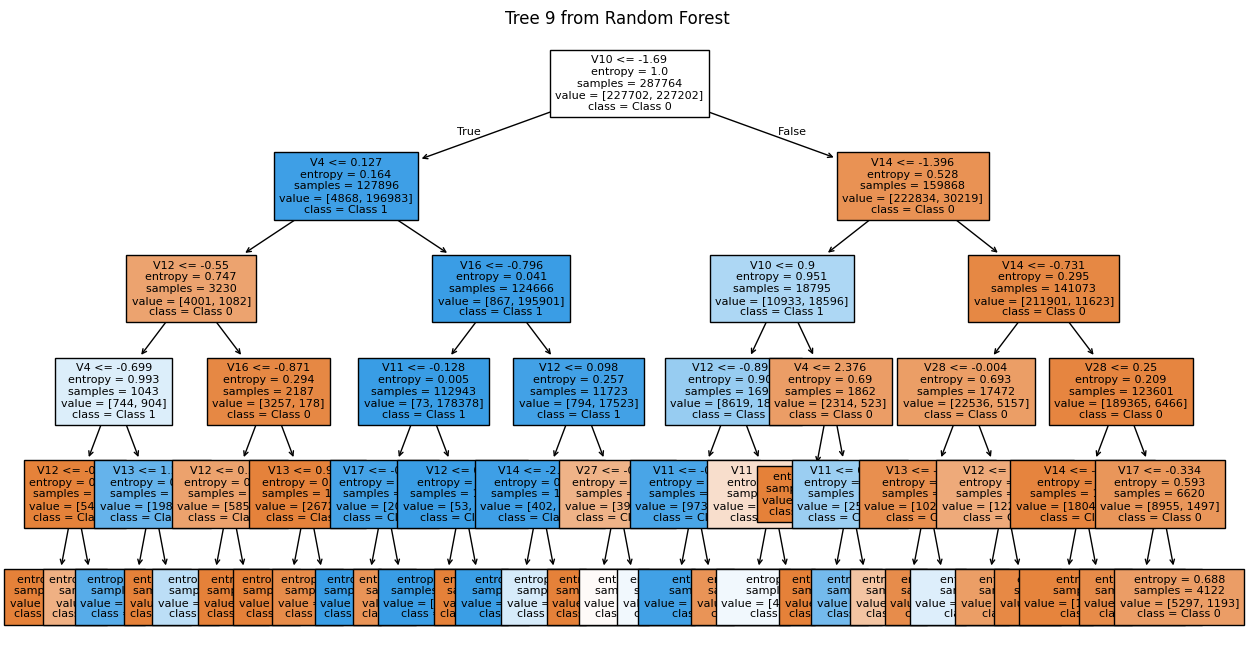

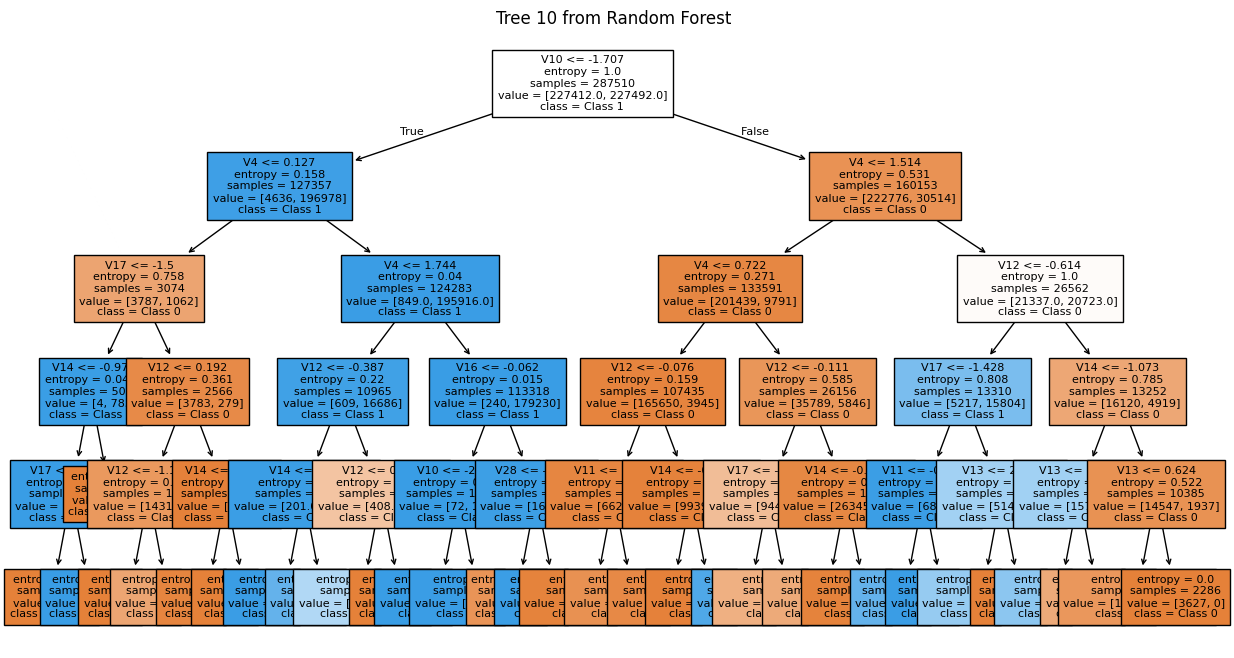

In [ ]:
num_trees_to_plot = 10  # Change this to visualize more trees

plt.figure(figsize=(15, 10))

for i in range(num_trees_to_plot):
    plt.figure(figsize=(15, 8))
    plot_tree(RFFrf.estimators_[i],
              filled=True,
              feature_names=RFFX_train.columns,
              class_names=["Class 0", "Class 1"],
              fontsize=8)
    plt.title(f"Tree {i+1} from Random Forest")
    plt.show()

### Using RFSM

[link text](https://chatgpt.com/share/67fcd5c0-69e8-8006-945e-f5df6de64306)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
RFSMX_train = X_train[RFSM]

In [ ]:
RFSMrf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, random_state=42)
RFSMrf.fit(RFSMX_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
RFSMX_test = X_test[RFSM]

Precision: 0.99
Recall: 0.94
F1 Score: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     56863
           1       0.99      0.94      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



<ipython-input-51-dd4220ca2010>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette='viridis')


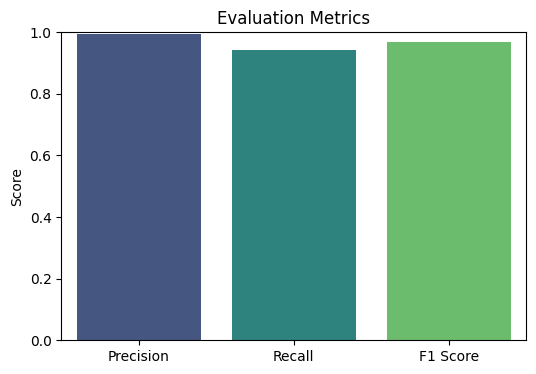

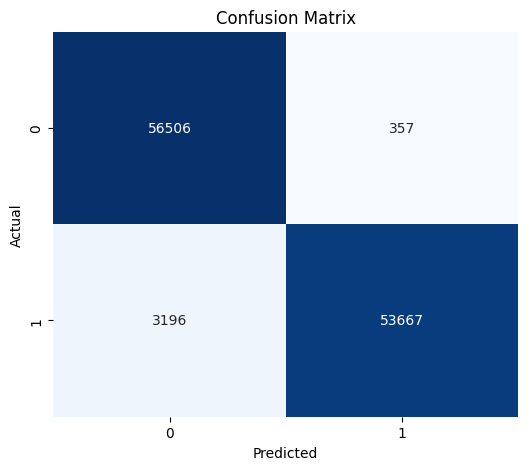

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Predictions
y_pred = RFSMrf.predict(RFSMX_test)

# Scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot bar chart of metrics
plt.figure(figsize=(6, 4))
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F1 Score']
sns.barplot(x=labels, y=metrics, palette='viridis')
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### RFSM explain

In [ ]:
importances = RFSMrf.feature_importances_

# Create a DataFrame for sorting and display
feature_importance_df = pd.DataFrame({
    'Feature': RFSMX_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top N features
print(feature_importance_df.head(10))

   Feature  Importance
10     V14    0.271480
9      V12    0.153779
7      V10    0.142381
12     V17    0.108982
3       V4    0.095568
8      V11    0.068336
2       V3    0.059594
5       V7    0.027720
1       V2    0.025991
11     V16    0.023777


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

<Figure size 1500x1000 with 0 Axes>

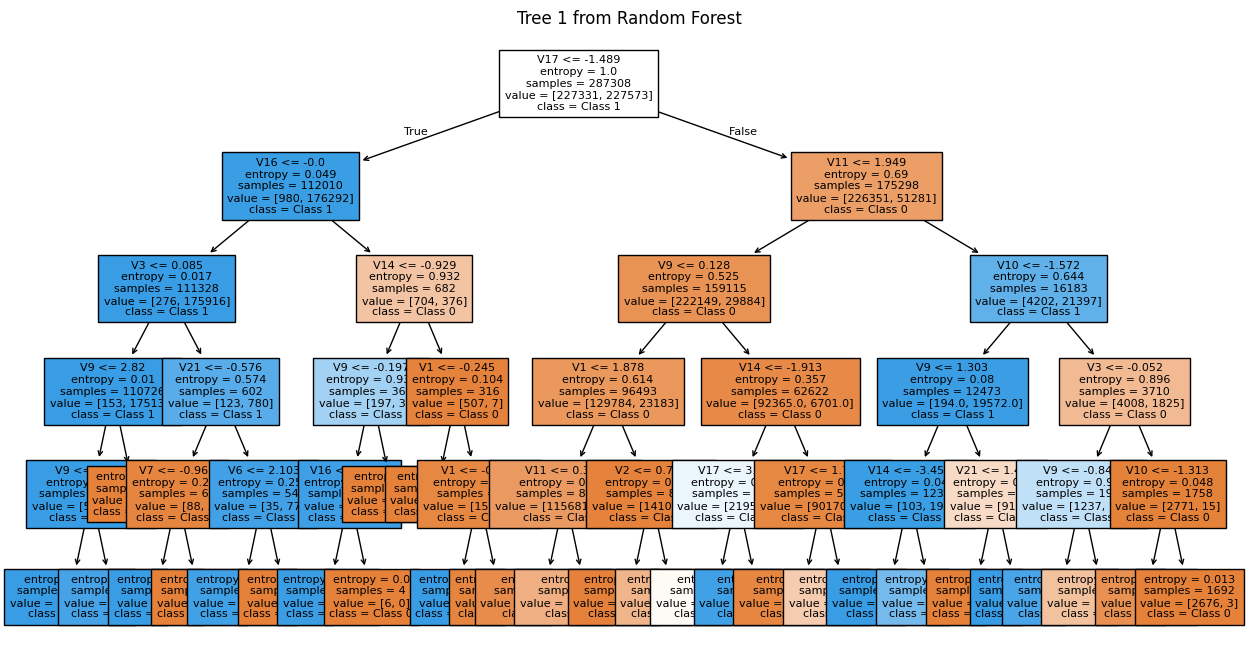

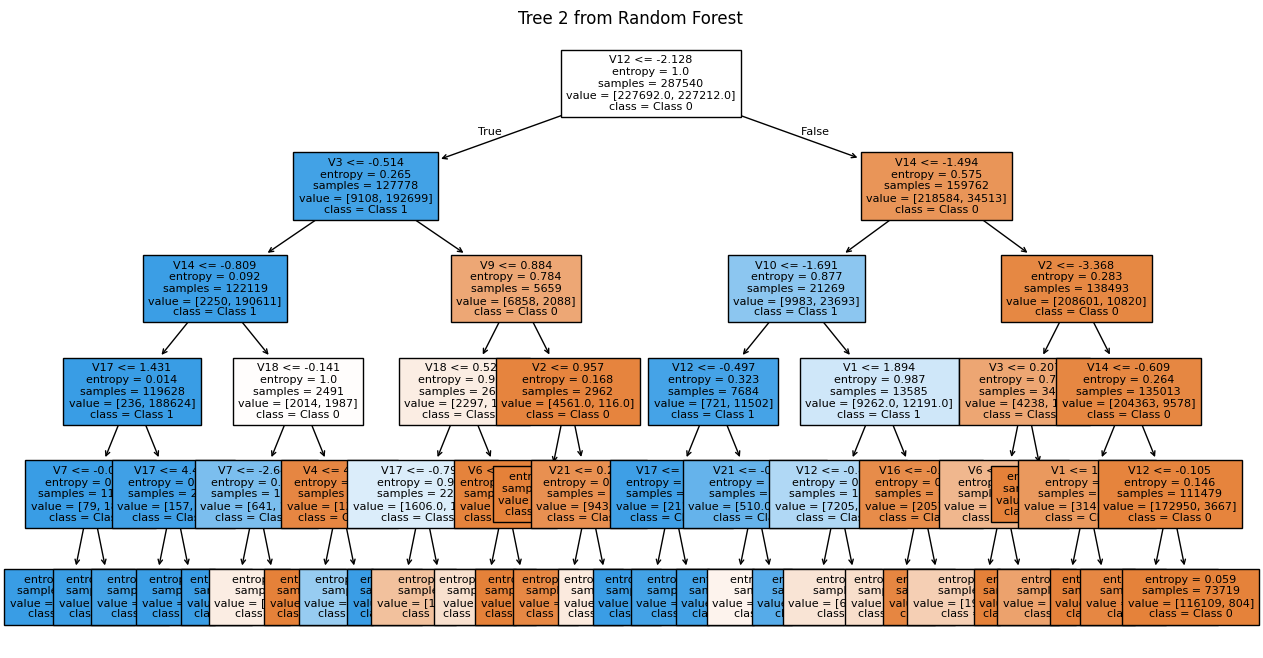

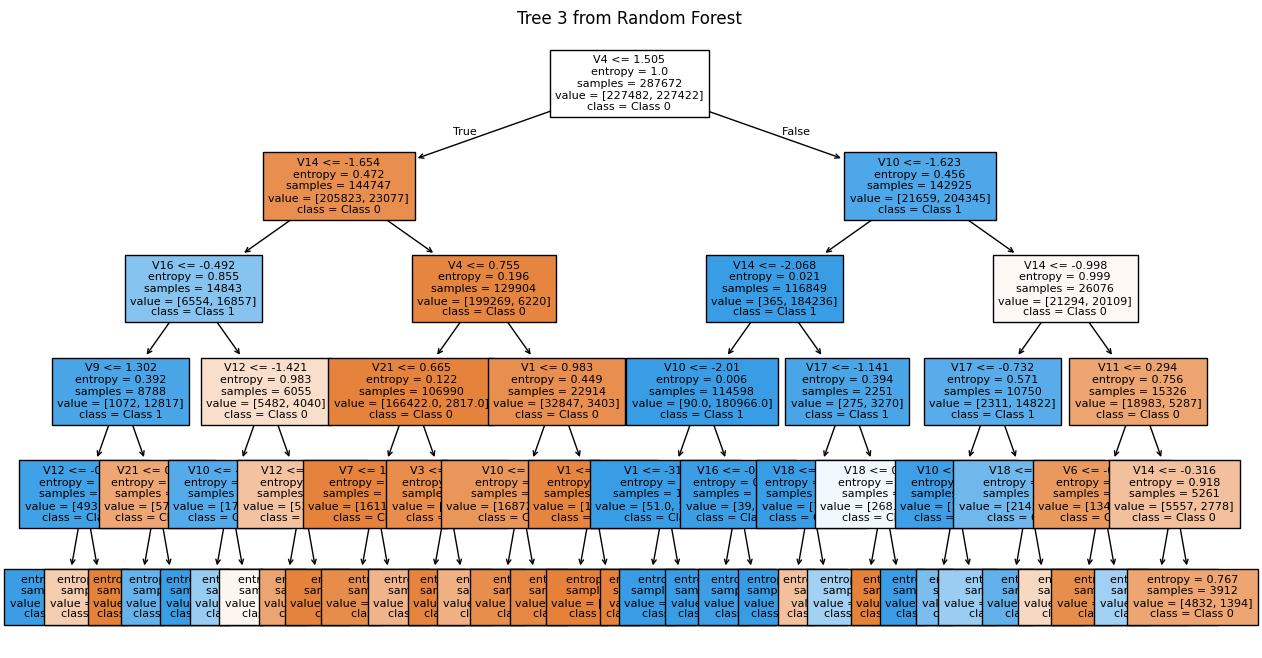

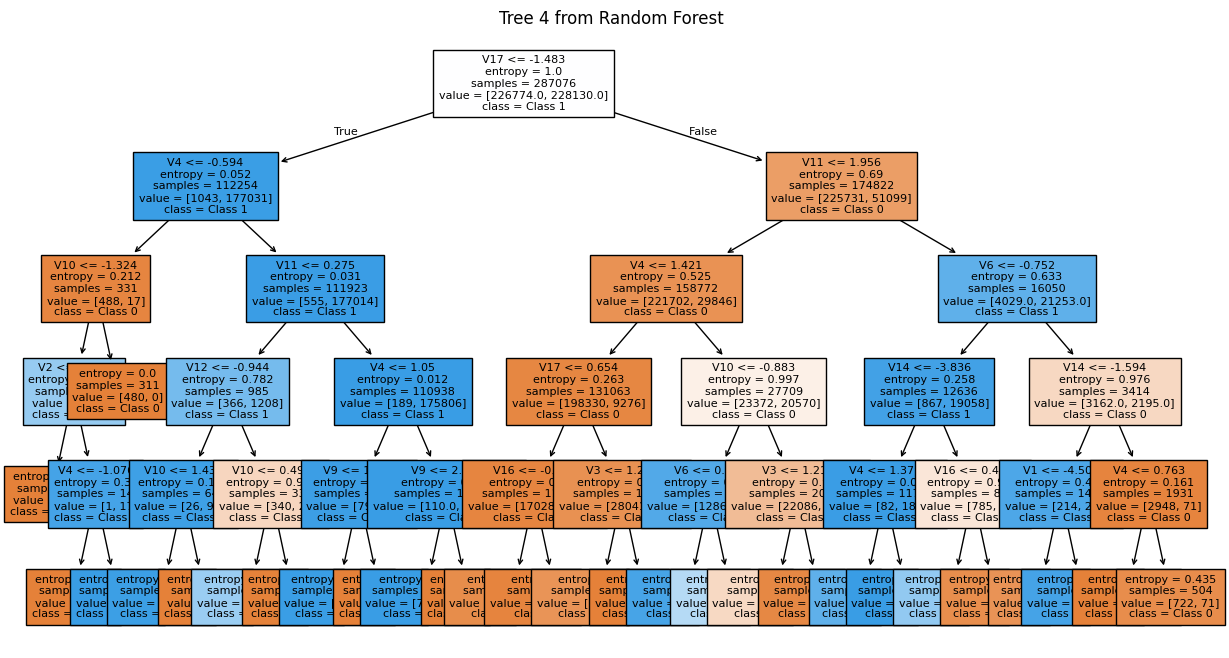

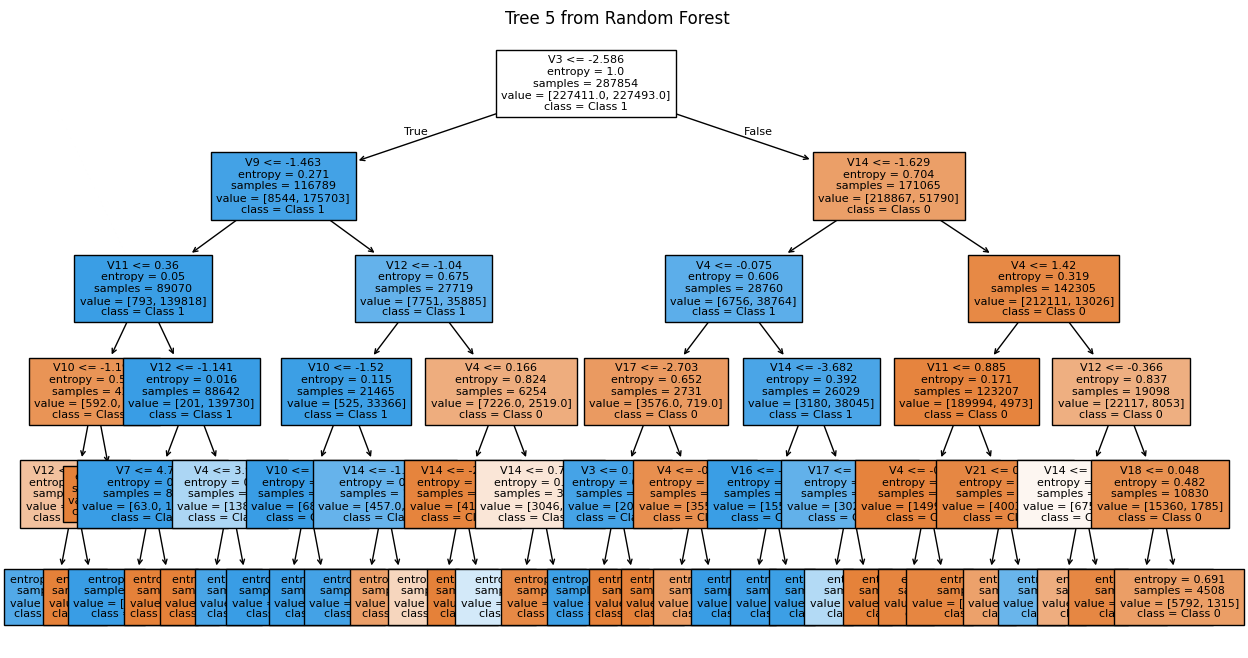

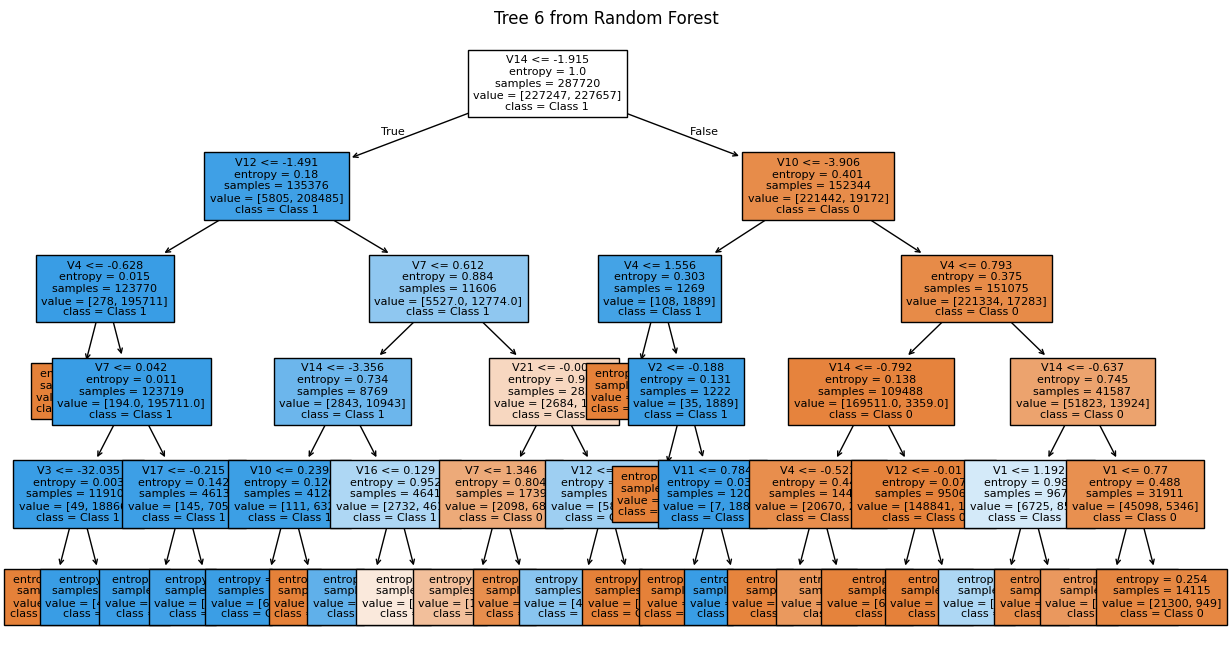

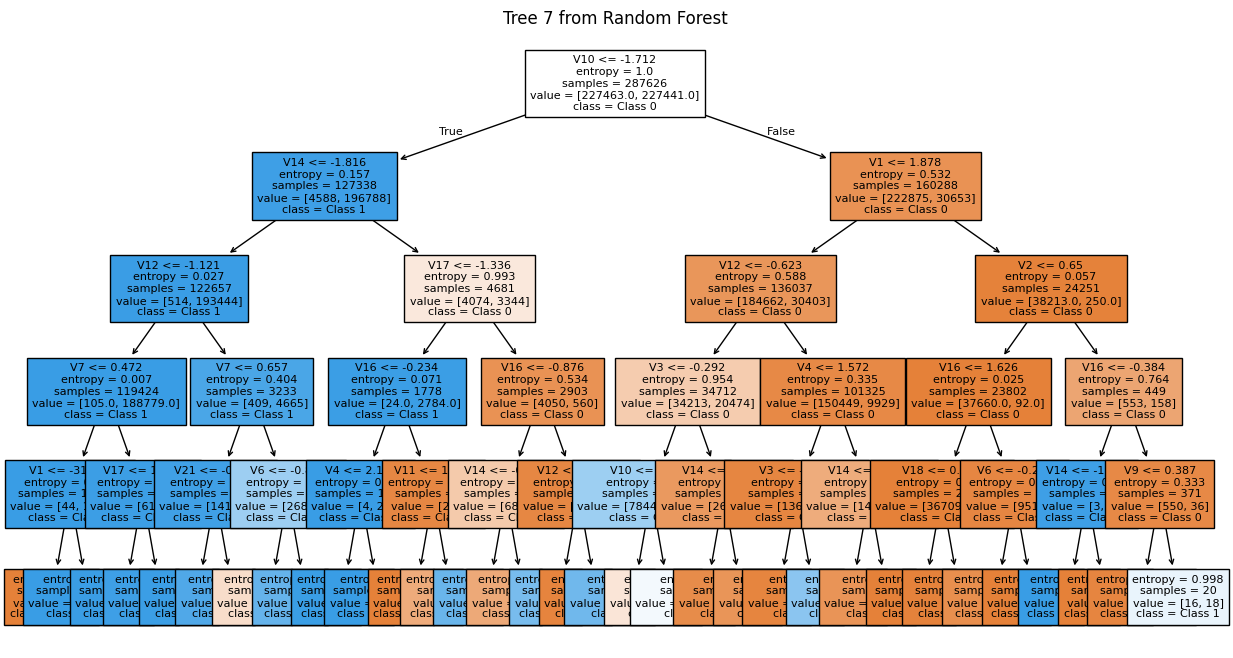

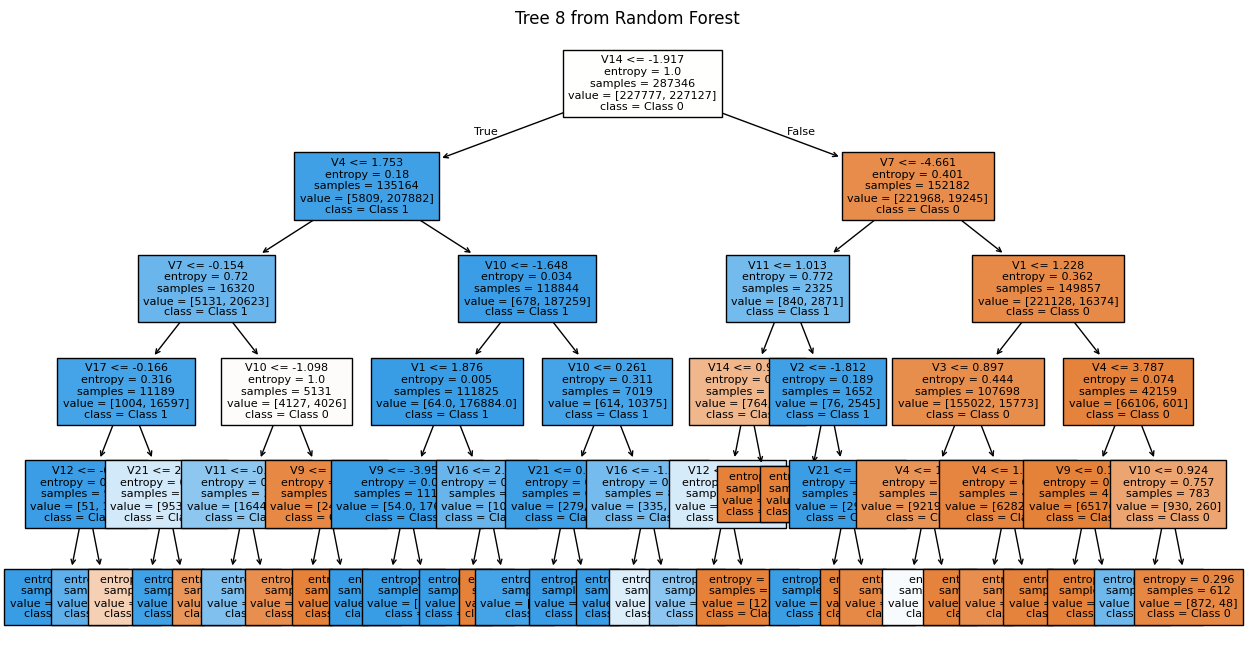

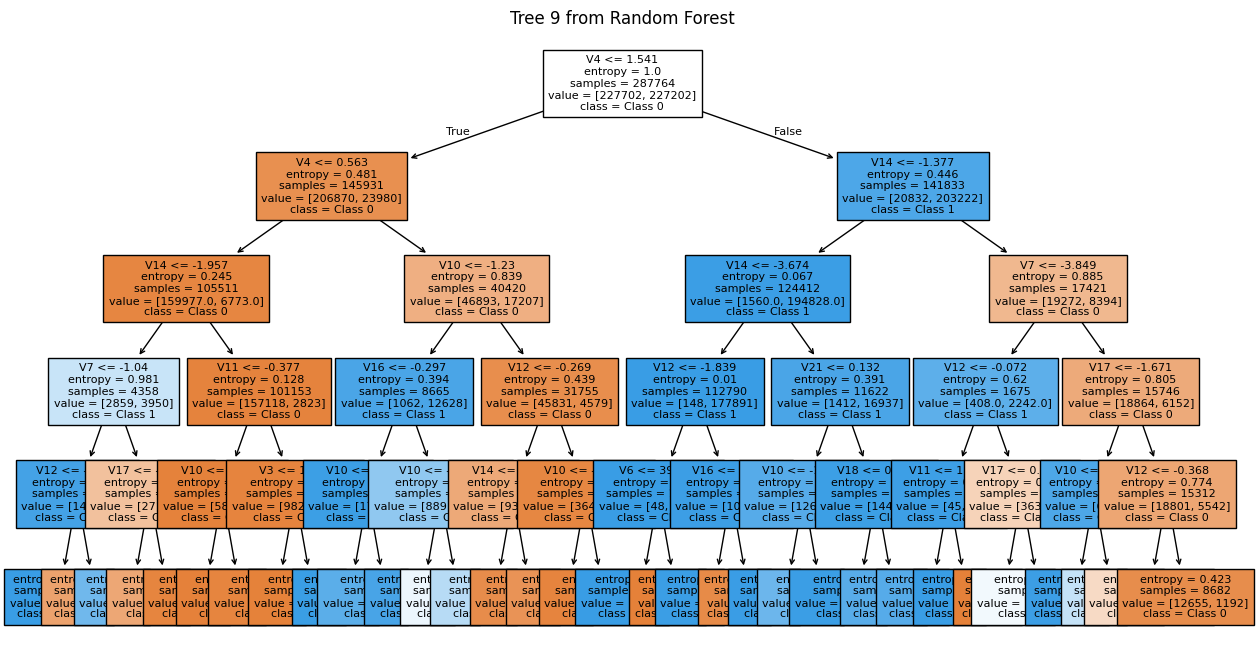

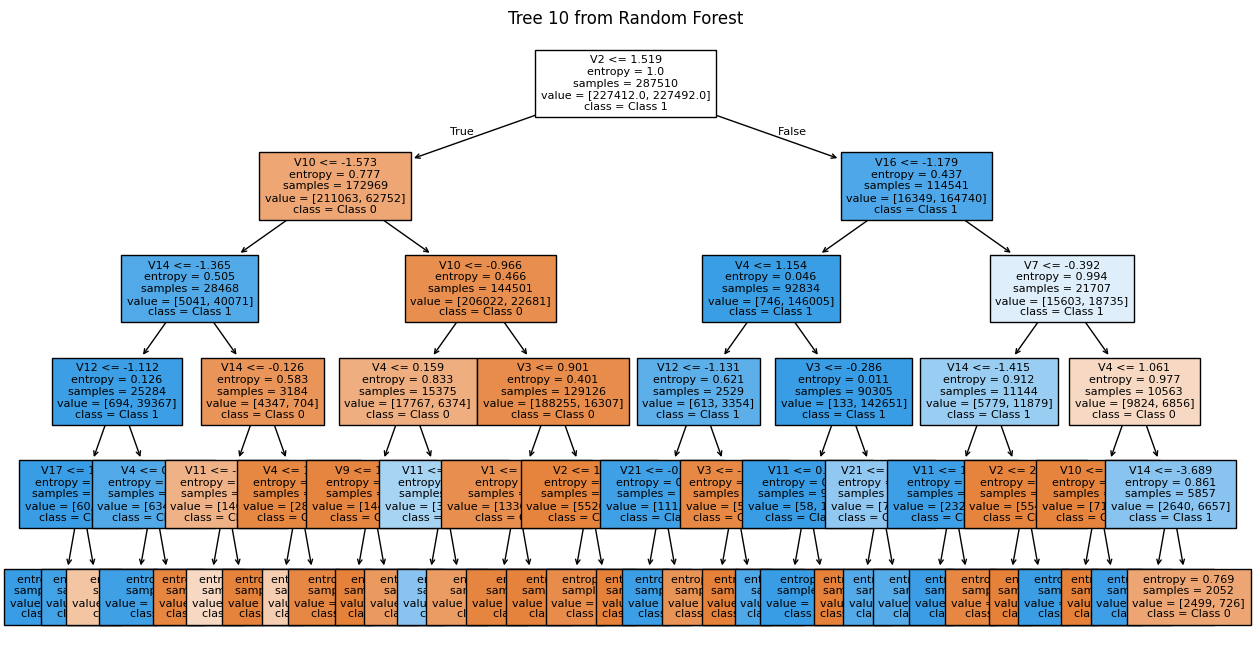

In [ ]:
num_trees_to_plot = 10  # Change this to visualize more trees

plt.figure(figsize=(15, 10))

for i in range(num_trees_to_plot):
    plt.figure(figsize=(15, 8))
    plot_tree(RFSMrf.estimators_[i],
              filled=True,
              feature_names=RFSMX_train.columns,
              class_names=["Class 0", "Class 1"],
              fontsize=8)
    plt.title(f"Tree {i+1} from Random Forest")
    plt.show()

# Second Model,

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Initialize Gradient Boosting with class weights
gbc = GradientBoostingClassifier(random_state=42)